<a href="https://colab.research.google.com/github/Arias0907/Binarizacion-/blob/master/Binarizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/PDI/Interpolacion'
os.chdir(path)
!pwd
# graficar imagenes estaticas en el notebook

%matplotlib inline

/content/drive/My Drive/PDI/Interpolacion


In [0]:
def displayGray3(a,b,c, title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c, cmap = 'gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayGray2(a,b, title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a, cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b, cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor3(a,b,c, title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor2(a,b, title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

#**Binarización**

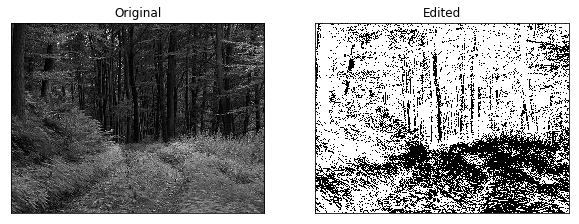

In [21]:
def binarizacion(img, minr=10, maxr=60):
    img = cv2.imread(img,0)
    # Find width and height of image
    row, column = img.shape
    #Create an zeros array to store the sliced image
    img1= np.zeros((row, column), dtype = 'uint8')
    # Specify the min and dw max ranger
    min_range=minr
    max_range=maxr
    
    #loop over the input image and if pixel val
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j] = 255
            else: 
                img1[i,j] = 0
    #Display the image
    displayGray2(img, img1)
    
binarizacion('tree.png',10,80)

#**Fraccionamiento del nivel de grises**

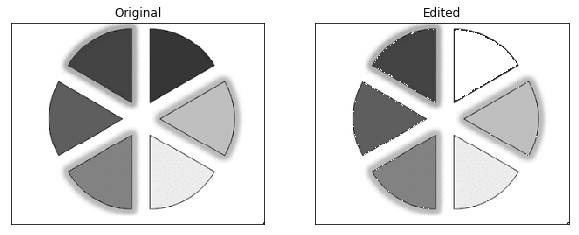

In [98]:
def Fracionamiento(img,minr=10,maxr=60):
    #Cargar imagen
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2=np.zeros((rows, columns), dtype = np.uint8)
    
    #intervalos
    a=minr
    b=maxr
    
    for x in range(0,rows):
        for y in range(0,columns):
          r=img[x][y]
          if a<=r and r<=b:
              img2[x,y] =255
          else:
              img2[x,y] = img[x,y]
              
    displayGray2(img,img2)
    return
  
Fracionamiento('pastel.png', 50,58)


#**Aplicacion de la Binarizacion y de la Fraccionamiento**

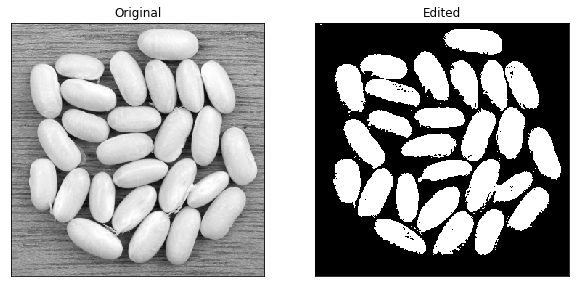

In [84]:
def binarizacion(img, minr=10, maxr=60):
    img = cv2.imread(img,0)
    # Find width and height of image
    row, column = img.shape
    #Create an zeros array to store the sliced image
    img1= np.zeros((row, column), dtype = 'uint8')
    # Specify the min and dw max ranger
    min_range=minr
    max_range=maxr
    
    #loop over the input image and if pixel val
    for i in range(row):
        for j in range(column):
            if img[i,j]>min_range and img[i,j]<max_range:
                img1[i,j] = 255
            else: 
                img1[i,j] = 0
    #Display the image
    displayGray2(img, img1)
    
binarizacion('frijol.jpg',208,255)

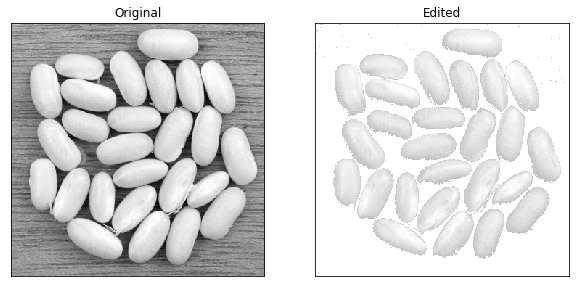

In [99]:
Fracionamiento('/content/drive/My Drive/PDI/Parcial 1/frijol.jpg',20,195)

#**Threshold(Binarización por umbral)**

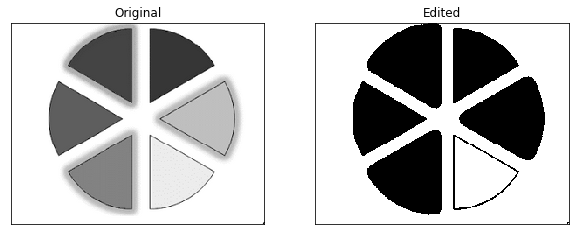

In [102]:
def Threshold(img,thres):
    #cargar imgen
    img= cv2.imread(img,cv2.IMREAD_GRAYSCALE)
    rows, columns = img.shape
    img2=np.zeros((rows,columns), dtype=np.uint8)

    #intervalos
    T=thres

    for x in range(0,rows):
        for y in range(0,columns):
            r=img[x][y]
            if T>=r:
                img2[x,y]=0
            else:
                img2[x,y]=255
    
    displayGray2(img,img2)
    
Threshold('pastel.png', 220)

#**Bit plane slicing**

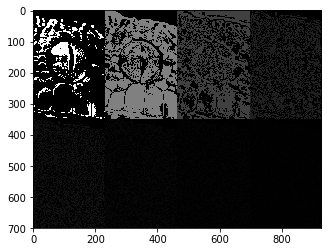

In [103]:
img = cv2.imread('ojo.jpg',0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

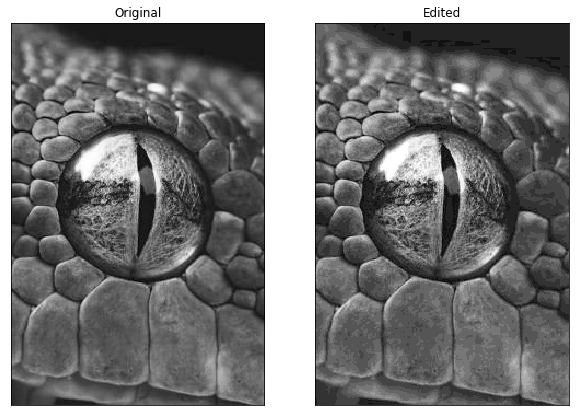

In [107]:
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
#plt.imshow(new_img,cmap='gray')
displayGray2(img,new_img)